In [2]:
#Finding beta
from numpy.linalg import inv
from numpy import dot, transpose

X=[[1,6,2],[1,8,1],[1,10,0],[1,14,2],[1,18,0]]
y=[[7],[9],[13],[17.5],[18]]

print(dot(inv(dot(transpose(X),X)),dot(transpose(X),y))) #dot product = produit scalaire

[[1.1875    ]
 [1.01041667]
 [0.39583333]]


In [4]:
#Another way
from numpy.linalg import lstsq

X=[[1,6,2],[1,8,1],[1,10,0],[1,14,2],[1,18,0]]
y=[[7],[9],[13],[17.5],[18]]

print(lstsq(X,y)[0])


[[1.1875    ]
 [1.01041667]
 [0.39583333]]


C:\Users\USER\AppData\Local\Temp\ipykernel_21260\2540170611.py:6: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  print(lstsq(X,y)[0])


In [6]:
#Multilinear regression
from sklearn.linear_model import LinearRegression

X=[[6,2],[8,1],[10,0],[14,2],[18,0]]
y=[[7],[9],[13],[17.5],[18]]

model=LinearRegression()
model.fit(X,y)

X_test=[[8,2],[9,0],[11,2],[16,2],[12,0]]
y_test=[[11],[8.5],[15],[18],[11]]

predictions=model.predict(X_test)

for i,prediction in enumerate(predictions):
    print('Predicted: %s, Target: %s' %(prediction,y_test[i]))
    print('R-squared: %.2f' %model.score(X_test, y_test))


Predicted: [10.0625], Target: [11]
R-squared: 0.77
Predicted: [10.28125], Target: [8.5]
R-squared: 0.77
Predicted: [13.09375], Target: [15]
R-squared: 0.77
Predicted: [18.14583333], Target: [18]
R-squared: 0.77
Predicted: [13.3125], Target: [11]
R-squared: 0.77


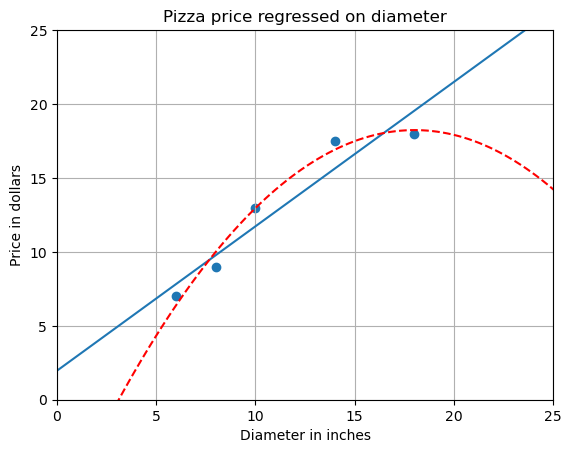

[[6], [8], [10], [14], [18]]
[[  1.   6.  36.]
 [  1.   8.  64.]
 [  1.  10. 100.]
 [  1.  14. 196.]
 [  1.  18. 324.]]
[[6], [8], [11], [16]]
[[  1.   6.  36.]
 [  1.   8.  64.]
 [  1.  11. 121.]
 [  1.  16. 256.]]
Simple linear regression r-squared 0.809726797707665
Quadratic regression r-squared 0.8675443656345073


In [19]:
# Polynomial regression (quadratic regression) (The result is magnificent!!!!)
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

X_train=[[6],[8],[10],[14],[18]]
y_train=[[7],[9],[13],[17.5],[18]]
X_test=[[6],[8],[11],[16]]
y_test=[[8],[12],[15],[18]]

regressor=LinearRegression()
regressor.fit(X_train,y_train)
xx=np.linspace(0,26,100)
yy=regressor.predict(xx.reshape(xx.shape[0],1))
plt.plot(xx,yy)
quadratic_featurizer=PolynomialFeatures(degree=2)
X_train_quadratic=quadratic_featurizer.fit_transform(X_train)
X_test_quadratic=quadratic_featurizer.transform(X_test)
regressor_quadratic=LinearRegression()
regressor_quadratic.fit(X_train_quadratic,y_train)
xx_quadratic=quadratic_featurizer.transform(xx.reshape(xx.shape[0],1))
plt.plot(xx,regressor_quadratic.predict(xx_quadratic),c='r',linestyle='--')
plt.title('Pizza price regressed on diameter')
plt.xlabel('Diameter in inches')
plt.ylabel('Price in dollars')
plt.axis([0,25,0,25])
plt.grid(True)
plt.scatter(X_train,y_train)
plt.show()
print(X_train)
print(X_train_quadratic)
print(X_test)
print(X_test_quadratic)
print('Simple linear regression r-squared', regressor.score(X_test,y_test))
print('Quadratic regression r-squared', regressor_quadratic.score(X_test_quadratic,y_test))

In [13]:
X=[[1],[2],[3]]
y=PolynomialFeatures(degree=2)
Xq=y.fit_transform(X)
Xq=y.transform(X)
Xq

array([[1., 1., 1.],
       [1., 2., 4.],
       [1., 3., 9.]])

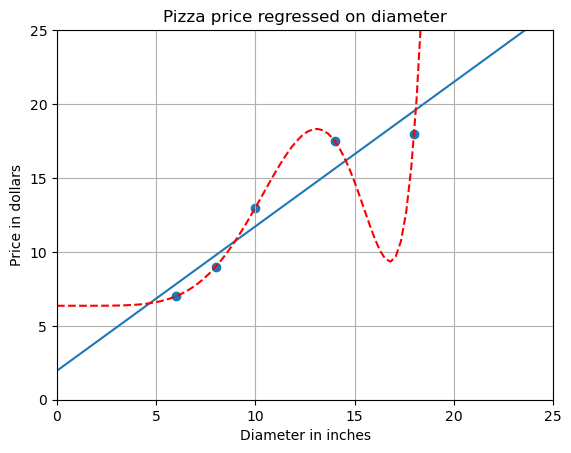

[[6], [8], [10], [14], [18]]
[[1.00000000e+00 6.00000000e+00 3.60000000e+01 2.16000000e+02
  1.29600000e+03 7.77600000e+03 4.66560000e+04 2.79936000e+05
  1.67961600e+06 1.00776960e+07]
 [1.00000000e+00 8.00000000e+00 6.40000000e+01 5.12000000e+02
  4.09600000e+03 3.27680000e+04 2.62144000e+05 2.09715200e+06
  1.67772160e+07 1.34217728e+08]
 [1.00000000e+00 1.00000000e+01 1.00000000e+02 1.00000000e+03
  1.00000000e+04 1.00000000e+05 1.00000000e+06 1.00000000e+07
  1.00000000e+08 1.00000000e+09]
 [1.00000000e+00 1.40000000e+01 1.96000000e+02 2.74400000e+03
  3.84160000e+04 5.37824000e+05 7.52953600e+06 1.05413504e+08
  1.47578906e+09 2.06610468e+10]
 [1.00000000e+00 1.80000000e+01 3.24000000e+02 5.83200000e+03
  1.04976000e+05 1.88956800e+06 3.40122240e+07 6.12220032e+08
  1.10199606e+10 1.98359290e+11]]
[[6], [8], [11], [16]]
[[1.00000000e+00 6.00000000e+00 3.60000000e+01 2.16000000e+02
  1.29600000e+03 7.77600000e+03 4.66560000e+04 2.79936000e+05
  1.67961600e+06 1.00776960e+07]
 [1.0

In [20]:
#Overfiting We have learned an extremely complex model that fits the training data
#exactly, but fails to approximate the real relationship. This problem is called overfitting.
#This model exactly fits the training data, butfailed to learn the real relationship between size and price.


import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

X_train=[[6],[8],[10],[14],[18]]
y_train=[[7],[9],[13],[17.5],[18]]
X_test=[[6],[8],[11],[16]]
y_test=[[8],[12],[15],[18]]

regressor=LinearRegression()
regressor.fit(X_train,y_train)
xx=np.linspace(0,26,100)
yy=regressor.predict(xx.reshape(xx.shape[0],1))
plt.plot(xx,yy)
quadratic_featurizer=PolynomialFeatures(degree=9)
X_train_quadratic=quadratic_featurizer.fit_transform(X_train)
X_test_quadratic=quadratic_featurizer.transform(X_test)
regressor_quadratic=LinearRegression()
regressor_quadratic.fit(X_train_quadratic,y_train)
xx_quadratic=quadratic_featurizer.transform(xx.reshape(xx.shape[0],1))
plt.plot(xx,regressor_quadratic.predict(xx_quadratic),c='r',linestyle='--')
plt.title('Pizza price regressed on diameter')
plt.xlabel('Diameter in inches')
plt.ylabel('Price in dollars')
plt.axis([0,25,0,25])
plt.grid(True)
plt.scatter(X_train,y_train)
plt.show()
print(X_train)
print(X_train_quadratic)
print(X_test)
print(X_test_quadratic)
print('Simple linear regression r-squared', regressor.score(X_test,y_test))
print('Quadratic regression r-squared', regressor_quadratic.score(X_test_quadratic,y_test))